In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

In [ ]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
#1

linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [ ]:
# Value of y intercept
y_int = linreg.intercept_
print("Y - intercept is: ", y_int)

Y - intercept is:  0.45931464523595267


In [ ]:
slope = linreg.coef_
print("Slope is: ", slope)

Slope is:  [0.20299973]


In [ ]:
print("Equation of the model is: ", slope[0], "* x + ", y_int)

Equation of the model is:  0.20299973140771363 * x +  0.45931464523595267


1. Equation of the model is:  $3.410322999513064 * x +  22.848982308066887$

In [ ]:
y_pred = linreg.predict(x)
y_pred

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

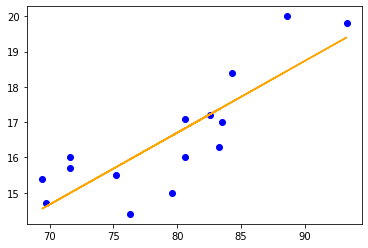

In [ ]:
#2

plt.scatter(x, y, color = 'blue')
plt.plot(x, y_pred, color = 'orange')
plt.show()

In [ ]:
#3

r_sq = linreg.score(x, y)
print("r^2 value is: ",r_sq)

r^2 value is:  0.6922946529146998


3. $R^2$ value is $0.6922946529146998$. A value $0.8$ and greater is considered a strong correlation, but here we have a value less than that. 

In [ ]:
#4

chirp95 = linreg.predict([[95]])
print("The approximate rate the crickets would be chirping at ground temperature 95 is : ", chirp95[0])

The approximate rate the crickets would be chirping at ground temperature 95 is :  19.74428912896875


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4. When the ground temperature reaches $95$, then approximate rate at which the crickets would be chirping is $19.74428912896875$

In [ ]:
#5

temp18 = (18 - linreg.intercept_) / linreg.coef_
print("the approximate ground temperature is: ", temp18[0])

the approximate ground temperature is:  86.40743134548568


The approximate ground temperature for 18 chirps per second is:  86.40743134548568

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
x = df['Brain']
x = x.to_frame()
y = df['Body']

In [ ]:
#1

linreg = linear_model.LinearRegression()
linreg.fit(x, y)

# Value of y intercept
y_int = linreg.intercept_
print("Y - intercept is: ", y_int)

slope = linreg.coef_[0]
print("Slope is: ", slope)

print("Equation of the model is: ", slope, "* x + ", y_int)

Y - intercept is:  91.00439620740687
Slope is:  0.9664963676725759
Equation of the model is:  0.9664963676725759 * x +  91.00439620740687


1. The linear regression equation is:  $0.9664963676725759 x +  91.00439620740687$

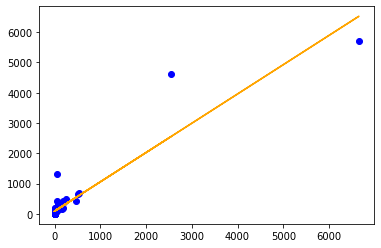

In [ ]:
#2

y_pred = linreg.predict(x)
y_pred

plt.scatter(x, y, color = 'blue')
plt.plot(x, y_pred, color = 'orange')
plt.show()

In [ ]:
#3

r_sq = linreg.score(x, y)
print("r^2 value is: ",r_sq)

r^2 value is:  0.8726620843043331


3. $r^2$ value is:  0.8726620843043331, determing that the model is a good fit since the value is more than 0.8


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[["Rank"]]).toarray())

#merge one-hot encoded columns back with original DataFrame
df1 = df.join(encoder_df)

In [ ]:
df1.head()

,Sex,Rank,Year,Degree,YSdeg,Salary,0,1,2
0,0,3,25,1,35,36350,0.0,0.0,1.0
1,0,3,13,1,22,35350,0.0,0.0,1.0
2,0,3,10,1,23,28200,0.0,0.0,1.0
3,1,3,7,1,27,26775,0.0,0.0,1.0
4,0,3,19,0,30,33696,0.0,0.0,1.0


In [ ]:
df1 = df1.drop("Rank", axis = True)
df1.head()

,Sex,Year,Degree,YSdeg,Salary,0,1,2
0,0,25,1,35,36350,0.0,0.0,1.0
1,0,13,1,22,35350,0.0,0.0,1.0
2,0,10,1,23,28200,0.0,0.0,1.0
3,1,7,1,27,26775,0.0,0.0,1.0
4,0,19,0,30,33696,0.0,0.0,1.0


In [ ]:
y = df1["Salary"]

x = df1.drop("Salary", axis = 1)

In [ ]:
#1

linreg = linear_model.LinearRegression()
linreg.fit(x, y)

# Value of y intercept
y_int = linreg.intercept_
print("Y - intercept is: ", y_int)

coefficients = pd.DataFrame([x.columns,linreg.coef_]).T

Y - intercept is:  22605.03593319712


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
coefficients

,0,1
0,Sex,1166.373101
1,Year,476.309015
2,Degree,-1388.613319
3,YSdeg,-124.574321
4,0.0,-5470.374929
5,1.0,-178.014157
6,2.0,5648.389086


In [ ]:
print("Equation is : ")
for i in range(len(linreg.coef_)):
    print("+ (", linreg.coef_[i], "*x_",i, ") ", sep=' ', end='', flush=True)

Equation is : 
+ ( 1166.3731009926903 *x_ 0 ) + ( 476.30901513809965 *x_ 1 ) + ( -1388.6133186001032 *x_ 2 ) + ( -124.57432076008865 *x_ 3 ) + ( -5470.374928544194 *x_ 4 ) + ( -178.0141572335049 *x_ 5 ) + ( 5648.389085777688 *x_ 6 ) 

1. Equation of regression model is $( 1166.3731009926903 *x_ 0 ) + ( 476.30901513809965 *x_ 1 ) + ( -1388.6133186001032 *x_ 2 ) + ( -124.57432076008865 *x_ 3 ) + ( -5470.374928544194 *x_ 4 ) + ( -178.0141572335049 *x_ 5 ) + ( 5648.389085777688 *x_ 6 )$

In [ ]:
r_sq = linreg.score(x, y)
print("r^2 value is: ",r_sq)

r^2 value is:  0.8550405797225162


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from itertools import combinations

# all possible columns for X
cols = [x for x in df.columns if x != "Salary"]
# define Y as same accross the loops
Y = df["Salary"]
# define result dictionary
fit_d = {}

# loop for any length of combinations
for i in range(1, len(cols)+1):
    # loop for any combinations with length i
    for comb in combinations(cols, i):
        # Define X from the combination
        X = df[list(comb)]

        linreg = linear_model.LinearRegression()
        linreg.fit(X, Y)

        # save the rsquared in a dictionnary
        fit_d[comb] = linreg.score(X, Y)

# extract the key for the max R value
key_max = max(fit_d, key=fit_d.get)

In [ ]:
sorted(fit_d.items(), key=lambda x:x[1], reverse=True)

[(('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.8547180674410969),
 (('Sex', 'Rank', 'Year', 'YSdeg'), 0.8490366192262851),
 (('Rank', 'Year', 'Degree', 'YSdeg'), 0.8485077204335426),
 (('Rank', 'Year', 'YSdeg'), 0.8456725764485596),
 (('Sex', 'Rank', 'Year', 'Degree'), 0.845547641297936),
 (('Sex', 'Rank', 'Year'), 0.8454319861987166),
 (('Rank', 'Year', 'Degree'), 0.8437395200874137),
 (('Rank', 'Year'), 0.8436480933264597),
 (('Sex', 'Rank', 'Degree', 'YSdeg'), 0.7671813414350668),
 (('Sex', 'Rank', 'YSdeg'), 0.7666122610227071),
 (('Rank', 'Degree', 'YSdeg'), 0.7625149185326454),
 (('Rank', 'YSdeg'), 0.7623948189698249),
 (('Sex', 'Rank', 'Degree'), 0.7583144768153613),
 (('Rank', 'Degree'), 0.7557961688386643),
 (('Sex', 'Rank'), 0.7554917749443394),
 (('Rank',), 0.7525360539274633),
 (('Sex', 'Year', 'Degree', 'YSdeg'), 0.6311597502907436),
 (('Year', 'Degree', 'YSdeg'), 0.6236261611533503),
 (('Sex', 'Degree', 'YSdeg'), 0.5832708257660315),
 (('Sex', 'Year', 'YSdeg'), 0.58080639

In [ ]:
key_max

('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')

In [ ]:
print(f'Best variables {key_max} for a R2-value of {round(fit_d[key_max], 5)}')

Best variables ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg') for a R2-value of 0.85472


2. The selection of columns with the best $R^2$ score is $(Sex, Rank, Year, Degree, YSdeg)$ with score of $0.85472$

In [ ]:
df["Sex"].corr(df["Salary"])

-0.2527823685166353

From the above result, it is evident that Sex is not having a great impact on teh target variable Salary, since the value is near zero and hence is not a factor of salary.